設定gradient descent的Learning Rate以及初始點位置，嘗試設定當點跑過頭時，下一次的Learning Rate自動變成原本的一半，測試是否能更接近最小值

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

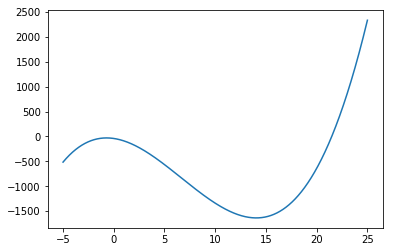

In [148]:
x = np.linspace(-5,25,100000) #選擇適當的x範圍
y = x**3 -20*x**2 - 30*x - 40 #設定y = x^3 -20x^2 -30x -40 微分後為 3x^2 - 40x -30

plt.plot(x,y)

In [120]:
def GD(start,LearningRate): #start:初始點 #LearnRate:"初始的"學習率
    point = start
    record = np.zeros((3,100)) #record矩陣用來紀錄:第一列是調整次數，第二列是點 第三列是點所位在圖形的切線斜率
    for i in range(0,100): #調整一百次
        record[0][i] = i
        
        record[1][i] = point
        slope = 3* point**2 -40*point - 30 #每次的微分值(切線斜率)
        record[2][i] = slope
        if record[2][i-1]*record[2][i] < 0: #如果這一次的斜率跟上一次的斜率異號，則將learnRate縮小一半
            LearningRate = LearningRate*0.5
        point = point - LearningRate*slope
       
    return record

測試看看初始點為5、起始Learning Rate=0.06

In [165]:
result = GD(5,0.06) 

接著利用我們存取的東西來看看逼近的過程是否合理

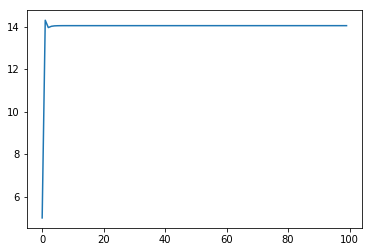

In [166]:
plt.plot(result[0],result[1]) #調整次數對X值作圖

看起來非常快就趨近於14左右，來看看實際的值

In [171]:
result[1]

array([ 5.        , 14.3       , 13.9559    , 14.01491848, 14.03506227,
       14.04186585, 14.04415552, 14.04492514, 14.04518372, 14.0452706 ,
       14.04529978, 14.04530958, 14.04531287, 14.04531398, 14.04531435,
       14.04531448, 14.04531452, 14.04531453, 14.04531454, 14.04531454,
       14.04531454, 14.04531454, 14.04531454, 14.04531454, 14.04531454,
       14.04531454, 14.04531454, 14.04531454, 14.04531454, 14.04531454,
       14.04531454, 14.04531454, 14.04531454, 14.04531454, 14.04531454,
       14.04531454, 14.04531454, 14.04531454, 14.04531454, 14.04531454,
       14.04531454, 14.04531454, 14.04531454, 14.04531454, 14.04531454,
       14.04531454, 14.04531454, 14.04531454, 14.04531454, 14.04531454,
       14.04531454, 14.04531454, 14.04531454, 14.04531454, 14.04531454,
       14.04531454, 14.04531454, 14.04531454, 14.04531454, 14.04531454,
       14.04531454, 14.04531454, 14.04531454, 14.04531454, 14.04531454,
       14.04531454, 14.04531454, 14.04531454, 14.04531454, 14.04

可以看的出來在二十幾次逼近後就已經趨近於14.04了，且到最後十次，已經精確到小數點後至少8位。

再來觀察斜率的變化

In [172]:
result[2]

array([-1.55000000e+02,  1.14700000e+01, -3.93456557e+00, -1.34291904e+00,
       -4.53572069e-01, -1.52644343e-01, -5.13081964e-02, -1.72391112e-02,
       -5.79139496e-03, -1.94550074e-03, -6.53541038e-04, -2.19539191e-04,
       -7.37480417e-05, -2.47735742e-05, -8.32198191e-06, -2.79553433e-06,
       -9.39080564e-07, -3.15457555e-07, -1.05969093e-07, -3.55972816e-08,
       -1.19580363e-08, -4.01689704e-09, -1.34934908e-09, -4.53269422e-10,
       -1.52226676e-10, -5.11590770e-11, -1.72803993e-11, -5.68434189e-12,
       -1.93267624e-12, -6.82121026e-13, -2.27373675e-13,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

看的出來最後非常趨近於零。最後把最終的點標在原先的圖形對照看看

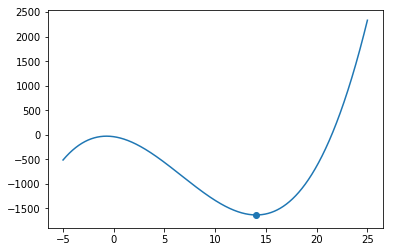

In [173]:
x = np.linspace(-5,25,100000) #選擇適當的x範圍
y = x**3 -20*x**2 - 30*x - 40 #設定y = x^3 -20x^2 -30x -40 微分後為 3x^2 - 40x -30

plt.plot(x,y)

a = 14.04531454
b = -1636.04536107 #r
plt.scatter(a,b)
plt.show()


再拉近一點看看

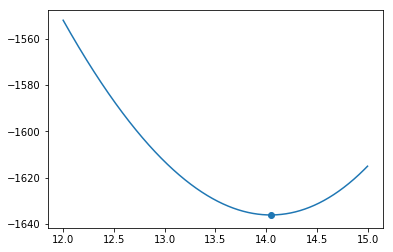

In [174]:
x = np.linspace(12,15,100000) #選擇適當的x範圍
y = x**3 -20*x**2 - 30*x - 40 #設定y = x^3 -20x^2 -30x -40 微分後為 3x^2 - 40x -30

plt.plot(x,y)

a = 14.04531454
b = -1636.04536107
plt.scatter(a,b)
plt.show()


可以確定此點十分接近最小值。 最後，讓我們測試看看有在調整途中把Learning Rate一直砍半，是不是真的能比原先的gradient descent快。

首先設立一個Learning Rate不會變的函數OGD

In [ ]:
def OGD(start,LearningRate): #start:初始點 #LearnRate:"初始的"學習率
    point = start
    record = np.zeros((3,100)) #record矩陣用來紀錄:第一列是調整次數，第二列是點 第三列是點所位在圖形的切線斜率
    for i in range(0,100): #調整一百次
        record[0][i] = i
        
        record[1][i] = point
        slope = 3* point**2 -40*point - 30 #每次的微分值(切線斜率)
        record[2][i] = slope

        point = point - LearningRate*slope
       
    return record

以一樣的參數來做對照

In [176]:
y = OGD(5,0.06)

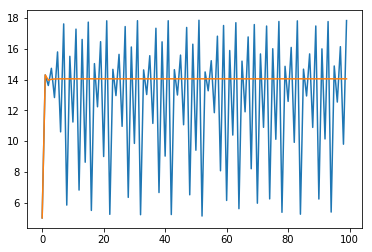

In [179]:
plt.plot(y[0],y[1])
plt.plot(result[0],result[1])

可以明顯的看出，當原本的gradient descent因過大的Learning Rate震盪時，有縮小Learning Rate的函數能飛快地趨近於極值